<a href="https://colab.research.google.com/github/hc0rd31r0/Bootcamp_Data_Science/blob/main/Bootcamp_DS_modulo2_aula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Módulo 2 - Aula 01

## Fontes externas, limpeza e manipulação

### **Carga de dados e importação das bibliotecas**

---

In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# configurações default
pd.options.display.float_format = "{:.2f}".format

# Comentei essa linha para aparecer o grid no #Desafio 01
sns.set()

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv",
                    engine='python',
                    encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total",axis=1)
colunas_interessantes = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessantes]
ordenado_por_total_milhoes = ordenado_por_total / 1000000
mes_mais_recente = ordenado_por_total_milhoes.columns[-4]
gastos_do_mais_recente = ordenado_por_total_milhoes[mes_mais_recente]
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo           251.70
31 Minas Gerais        126.33
41 Paraná               96.73
43 Rio Grande do Sul    76.29
33 Rio de Janeiro       68.16
Name: 2020/Abr, dtype: float64

In [3]:
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)

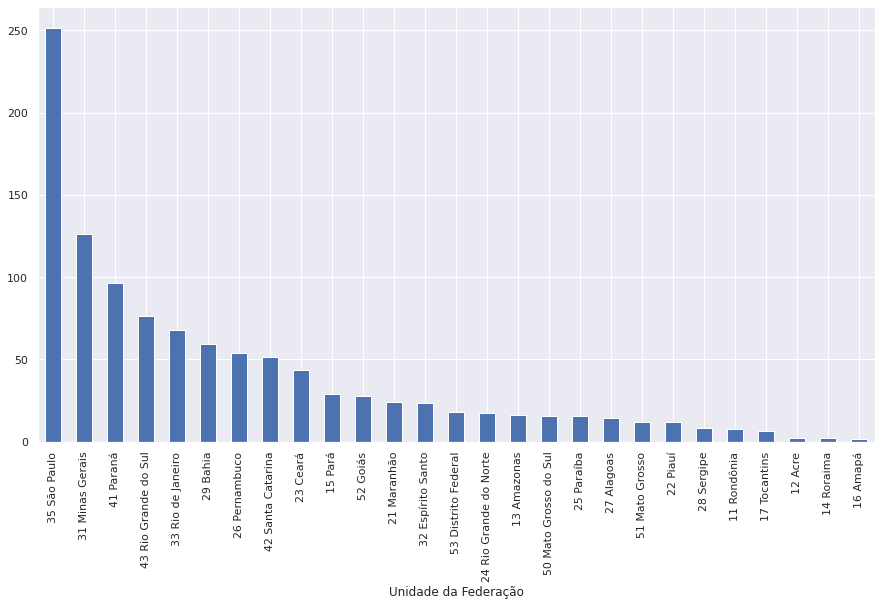

In [4]:
gastos_do_mais_recente.plot(kind='bar', figsize=(15,8))

In [5]:
gastos_do_mais_recente.sum()

1080.1533308499997

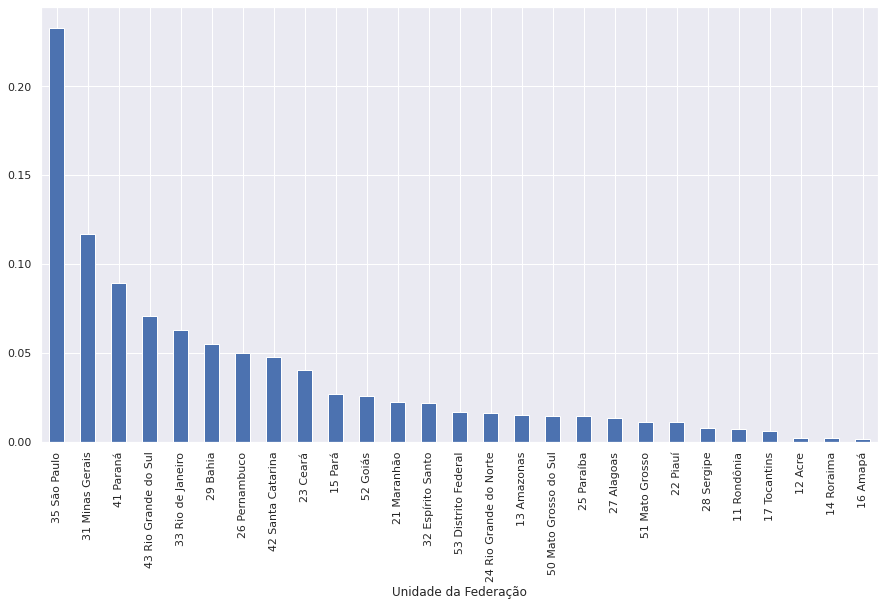

In [6]:
gastos_proporcionais = gastos_do_mais_recente / gastos_do_mais_recente.sum()
gastos_proporcionais.plot(kind='bar', figsize=(15,8))

In [7]:
ibge_estimativa = pd.read_excel("https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/estimativa_dou_2020.xls")
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,nan,POPULAÇÃO ESTIMADA
1,Brasil,nan,211755692
2,Região Norte,nan,18672591
3,Rondônia,nan,1796460
4,Acre,nan,894470


In [8]:
dados_da_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

# fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [9]:
from io import StringIO

dados_da_populacao_io = StringIO(dados_da_populacao)

populacao = pd.read_csv(dados_da_populacao_io, sep="\t")

Vamos remover o "Bahia Bahia" na Unidade federativa da tabela acima

In [10]:
gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]
gastos_do_mais_recente.index

Index(['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul',
       'Rio de Janeiro', 'Bahia', 'Pernambuco', 'Santa Catarina', 'Ceará',
       'Pará', 'Goiás', 'Maranhão', 'Espírito Santo', 'Distrito Federal',
       'Rio Grande do Norte', 'Amazonas', 'Mato Grosso do Sul', 'Paraíba',
       'Alagoas', 'Mato Grosso', 'Piauí', 'Sergipe', 'Rondônia', 'Tocantins',
       'Acre', 'Roraima', 'Amapá'],
      dtype='object', name='Unidade da Federação')

In [11]:
populacao = populacao.dropna()
populacao["populacao"] = populacao["População"].str.replace(" ", "").astype(int)
populacao["uf"] = populacao["Unidade federativa"]
populacao = populacao[["populacao", "uf"]].set_index('uf')
display(populacao.head())
display(populacao.info())

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries,  São Paulo to  Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


None

In [12]:
for estado in gastos_do_mais_recente.index:
  # print(f"{estado} {estado} => {estado}")
  populacao.index = populacao.index.str.replace(f"{estado} {estado}", estado)
populacao.index

Index([' São Paulo', ' Minas Gerais', ' Rio de Janeiro', 'Bahia', ' Paraná',
       ' Rio Grande do Sul', ' Pernambuco', ' Ceará', 'Pará',
       ' Santa Catarina', ' Maranhão', ' Goiás', ' Amazonas',
       ' Espírito Santo', ' Paraíba', ' Rio Grande do Norte', ' Mato Grosso',
       ' Alagoas', ' Piauí', ' Distrito Federal', ' Mato Grosso do Sul',
       ' Sergipe', ' Rondônia', ' Tocantins', ' Acre', ' Amapá', ' Roraima'],
      dtype='object', name='uf')

In [13]:
populacao

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840
Rio Grande do Sul,11422973
Pernambuco,9616621
Ceará,9187103
Pará,8690745


##**Desafios**

Desafio 01 - Entre nos dados do wikipedia e Leia a Base de dados direto do wikipedia.

Desafio 02 - Neste desafio temos uma série de passos:
*   Padronizar os nomes das colunas
*   Transformar os dados nos tipos corretos
*   Transformar a UF em index 

Desafio 03 - Buscar na documentação alguns métodos envolvendo strings

Desafio 04 - Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida".

#### **Desafio 01**

Usando o modo simples, pois não sou expert em Python

In [14]:
dados_da_populacao_html_raw = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o", match="População")
# Retorna 3 tabelas
dados_da_populacao_html_raw

[    Posição  ...        País comparável (habitantes)
 0         1  ...                Espanha (46 439 864)
 1         2  ...              Sri Lanka (20 675 000)
 2         3  ...          Países Baixos (16 922 900)
 3         4  ...                  Chade (14 037 000)
 4         5  ...                Bolívia (11 410 651)
 5         6  ...                Bélgica (11 250 659)
 6         7  ...            Bielorrússia (9 485 300)
 7         8  ...  Emirados Árabes Unidos (9 157 000)
 8         9  ...                 Áustria (8 602 112)
 9        10  ...                  Sérvia (7 114 393)
 10       11  ...                Paraguai (7 003 406)
 11       12  ...                Paraguai (7 003 406)
 12       13  ...                  Líbano (4 168 000)
 13       14  ...                  Líbano (4 168 000)
 14       15  ...                  Líbano (4 168 000)
 15       16  ...                 Uruguai (3 415 866)
 16       17  ...                 Uruguai (3 415 866)
 17       18  ...           

In [15]:
# A tabela [0] é que nos interessa
dados_da_populacao_html_raw[0].head()

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


#### **Desafio 02**

In [16]:
dados_da_populacao_html_raw[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Posição                       27 non-null     int64 
 1   Unidade federativa            27 non-null     object
 2   População                     27 non-null     object
 3   % da pop. total               27 non-null     object
 4   País comparável (habitantes)  27 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.2+ KB


In [17]:
dados_da_populacao_html = dados_da_populacao_html_raw[0]
# usando apenas as colunas que interessam
dados_da_populacao_html["uf"] = dados_da_populacao_html["Unidade federativa"].str.strip()
dados_da_populacao_html = dados_da_populacao_html.dropna()
dados_da_populacao_html["populacao"] = dados_da_populacao_html["População"].str.replace(" ", "")
dados_da_populacao_html["populacao"] = dados_da_populacao_html["populacao"].str.replace(".", "").astype(int)
dados_da_populacao_html["uf"] = dados_da_populacao_html["Unidade federativa"]
dados_da_populacao_html = dados_da_populacao_html[["populacao", "uf"]].set_index("uf")
dados_da_populacao_html.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


#### **Desafio 03**

Alguns métodos envolvendo strings

**casefold()** e **lower()**	Converte uma string para minúsculo, mas a documentação sugere usar casefold() por ser mais ***forte***.

**center(int)**  Centraliza uma string em int espaços.

**count(str)**  Conta quantas vezes str aparece na string.

**index(str)** e **find(str)**  Veja só, os 2 métodos retornam a posição de str numa string, a diferença é que index retorna um erro e find retorno -1.

**isspace()**  Cuidado com essa, retorna True se todos os caracteres da string são brancos (whitespaces), mas se sua string for algo assim:  "    \r\t", com caracteres de controle, vai retornar **True**. 

**strip()  lstrip()  rstrip()** Lida com os espaços antes e depois da string.

**split(separator)  rsplit(separator)**  separa a string de acordo com o separator

**capitalize() title()** capitalize() converte apenas a 1ª letra em maiúscula, title() converte todas as 1ª letras das palavras da string.

[w3schools](https://www.w3schools.com/python/python_ref_string.asp)

[Python 3.9.5 Doc](https://docs.python.org/3/library/stdtypes.html)


#### **Desafio 04**

In [18]:
import pandas as pd

def limpeza_populacao(url_wiki="https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o"):
    dados_wiki_raw = pd.read_html(url_wiki, attrs={"class":"wikitable"}, match="População")
    # Utilizando a 1ª tabela que tem os dados que interessa
    dados_wiki = dados_wiki_raw[0]
    # retirando os NaN
    dados_wiki = dados_wiki.dropna()
    # tratando as colunas que interessam
    dados_wiki["populacao"] = dados_wiki["População"].str.replace(" ", "")
    dados_wiki["populacao"] = dados_wiki["populacao"].str.replace(".", "").astype(int)
    dados_wiki["uf"] = dados_wiki["Unidade federativa"]
    # setando UF como nosso índice e utilizando as colunas que interessam
    dados_wiki_ret = dados_wiki[["populacao", "uf"]].set_index("uf")
    dados_wiki_ret.index = dados_wiki_ret.index.str.strip()
    return dados_wiki_ret

def limpeza_gastos_recente(url_gastos="/content/drive/MyDrive/databases/A102533189_28_143_208-A.csv", emMilhoes=True):
    dados_raw = pd.read_csv(url_gastos, engine='python', encoding="ISO-8859-1", 
                      skiprows = 3, sep=";", skipfooter=12, thousands=".", decimal=",")
    colunas_usaveis = dados_raw.mean().index.tolist()
    colunas_usaveis.insert(0,"Unidade da Federação")
    dados_usaveis = dados_raw[colunas_usaveis].copy()
    dados_usaveis["uf"] = dados_usaveis["Unidade da Federação"].str[3:]
    dados_usaveis = dados_usaveis.drop(["Total","Unidade da Federação"], axis = 1)
    dados_usaveis = dados_usaveis.set_index("uf")
    if emMilhoes:
       dados_usaveis = dados_usaveis / 1000000

    # descartando os últimos 3 meses por atraso de processamento
    mes_mais_recente = dados_usaveis.columns[-4]

    gastos_do_mais_recente = dados_usaveis[mes_mais_recente]
    gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)
    return gastos_do_mais_recente

def limpeza_pop_e_gasto(url_wiki="https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o",
                        url_gastos="/content/drive/MyDrive/databases/A102533189_28_143_208-A.csv", popEmMilhoes=True):
    tab1 = limpeza_populacao(url_wiki)
    tab2 = limpeza_gastos_recente(url_gastos, popEmMilhoes)
    unidas = tab1.join(tab2)
    return tab1, unidas

In [19]:
so_populacao, populacao_gasto = limpeza_pop_e_gasto()
display(so_populacao)
display(populacao_gasto)

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840
Rio Grande do Sul,11422973
Pernambuco,9616621
Ceará,9187103
Pará,8690745


,populacao,2020/Dez
uf,,
São Paulo,46289333,326.85
Minas Gerais,21292666,166.38
Rio de Janeiro,17366189,90.57
Bahia,14930634,83.13
Paraná,11516840,122.15
Rio Grande do Sul,11422973,116.83
Pernambuco,9616621,77.88
Ceará,9187103,50.27
Pará,8690745,36.91


O que aprendemos nessa aula:

*   Como comparar os gastos em relação a determinado estado;
*   Como fazer a leitura de dados no formato Excel com Pandas;
*   Como tornar uma string em (com formato de tabela) legível em pandas usando o String.IO;
*   Como usar Join em Pandas.
